In [1]:
from keras.datasets import reuters

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2113536/2110848 [==============================] - 19s 9us/step


In [4]:
train_data.shape

(8982,)

In [5]:
test_data.shape

(2246,)

In [6]:
test_data[0]

[1,
 4,
 1378,
 2025,
 9,
 697,
 4622,
 111,
 8,
 25,
 109,
 29,
 3650,
 11,
 150,
 244,
 364,
 33,
 30,
 30,
 1398,
 333,
 6,
 2,
 159,
 9,
 1084,
 363,
 13,
 2,
 71,
 9,
 2,
 71,
 117,
 4,
 225,
 78,
 206,
 10,
 9,
 1214,
 8,
 4,
 270,
 5,
 2,
 7,
 748,
 48,
 9,
 2,
 7,
 207,
 1451,
 966,
 1864,
 793,
 97,
 133,
 336,
 7,
 4,
 493,
 98,
 273,
 104,
 284,
 25,
 39,
 338,
 22,
 905,
 220,
 3465,
 644,
 59,
 20,
 6,
 119,
 61,
 11,
 15,
 58,
 579,
 26,
 10,
 67,
 7,
 4,
 738,
 98,
 43,
 88,
 333,
 722,
 12,
 20,
 6,
 19,
 746,
 35,
 15,
 10,
 9,
 1214,
 855,
 129,
 783,
 21,
 4,
 2280,
 244,
 364,
 51,
 16,
 299,
 452,
 16,
 515,
 4,
 99,
 29,
 5,
 4,
 364,
 281,
 48,
 10,
 9,
 1214,
 23,
 644,
 47,
 20,
 324,
 27,
 56,
 2,
 2,
 5,
 192,
 510,
 17,
 12]

In [8]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[0]])

In [16]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [17]:
# one way of vectroizing the labels by doing one hot encoding
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)


In [18]:
# builtin way of one hot encoding
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)


In [19]:
# Making a network
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [20]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [22]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 227us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 2s 189us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 176us/step - loss: 1.0952 - acc: 0.7651 - val_loss: 1.1709 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 180us/step - loss: 0.8697 - acc: 0.8168 - val_loss: 1.0788 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 185us/step - loss: 0.7034 - acc: 0.8474 - val_loss: 0.9839 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 1s 176us/step - loss: 0.5669 - acc: 0.8799 - val_loss: 0.9409 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 173us/step - loss: 0.4583 - acc: 0.9048 - val_loss: 0.9076 - val_acc: 0.8010


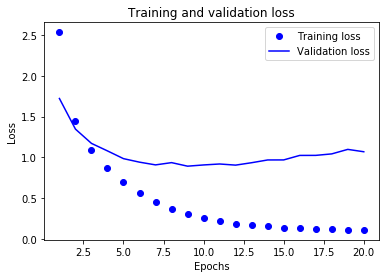

In [31]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

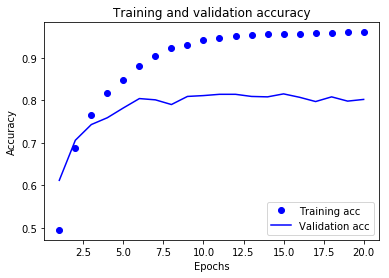

In [26]:

plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

The model beign to overfit after 9 epoch so lets train a new model on 9 epoch and then test it on test data

In [29]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 175us/step - loss: 2.6135 - acc: 0.4644 - val_loss: 1.7289 - val_acc: 0.6350
Epoch 2/8
7982/7982 [==============================] - 1s 148us/step - loss: 1.4074 - acc: 0.7082 - val_loss: 1.2747 - val_acc: 0.7310
Epoch 3/8
7982/7982 [==============================] - 1s 146us/step - loss: 1.0425 - acc: 0.7786 - val_loss: 1.1035 - val_acc: 0.7630
Epoch 4/8
7982/7982 [==============================] - 1s 143us/step - loss: 0.8180 - acc: 0.8322 - val_loss: 1.0270 - val_acc: 0.7820
Epoch 5/8
7982/7982 [==============================] - 1s 147us/step - loss: 0.6507 - acc: 0.8629 - val_loss: 0.9513 - val_acc: 0.8070
Epoch 6/8
7982/7982 [==============================] - 1s 144us/step - loss: 0.5297 - acc: 0.8904 - val_loss: 0.9206 - val_acc: 0.8120
Epoch 7/8
7982/7982 [==============================] - 1s 144us/step - loss: 0.4213 - acc: 0.9113 - val_loss: 0.9006 - val_acc: 0.8140
Epoch 8

In [30]:
results

[0.9903574393247773, 0.778272484443279]

In [32]:
predictions = model.predict(x_test)

In [43]:
predictions[0] # A 46 dimensional vector

array([1.2419830e-04, 8.5844833e-05, 3.7900132e-05, 4.8039076e-01,
       4.9257120e-01, 1.7515727e-05, 1.2289869e-04, 4.5078483e-05,
       1.3865286e-02, 1.2442545e-04, 4.6677972e-04, 1.6593256e-03,
       9.4395647e-05, 1.1743433e-03, 4.8278860e-04, 2.0164451e-04,
       1.2290047e-03, 6.4621534e-04, 2.2506045e-05, 2.4434766e-03,
       6.7275565e-04, 2.0683605e-04, 4.0843137e-05, 1.7077055e-04,
       7.5725802e-05, 2.0824766e-04, 1.2858711e-04, 8.6844571e-05,
       1.7000326e-04, 5.9568723e-05, 7.5510106e-05, 4.8850263e-05,
       4.7271611e-04, 5.9496988e-06, 1.8223526e-04, 3.2125583e-06,
       5.4425740e-04, 4.8174890e-05, 2.4741676e-04, 4.7079459e-04,
       1.1102930e-04, 3.6215253e-05, 8.4579606e-06, 6.9272814e-05,
       4.2477030e-05, 7.5780672e-06], dtype=float32)

In [45]:
np.argmax(predictions[0]) #the largest entry

4

In [46]:
np.sum(predictions[0]) #Since we used softmax os the sum would be 1

0.99999994

# A different way to handle the labels and the loss

In [47]:
#Another way to encode the label is to cast them as integer tensor
y_train = np.array(train_labels)
y_test = np.array(test_labels)
# the only thing that would change in this approach is the loss fucntion. With integer tensor, we use sparse_categorical_crossentropy
model.compile(optimizer = 'rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

#this new loss function is mathematically same as categorical_crossentropy. It just has adifferent interface

# Trying a model with information bottleneck

In [48]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu')) #since hidden unit are less then our total classes so we have a bottleneck
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 264us/step - loss: 2.5637 - acc: 0.5200 - val_loss: 1.8599 - val_acc: 0.5550
Epoch 2/20
7982/7982 [==============================] - 2s 200us/step - loss: 1.5980 - acc: 0.5972 - val_loss: 1.5059 - val_acc: 0.6260
Epoch 3/20
7982/7982 [==============================] - 2s 193us/step - loss: 1.3106 - acc: 0.6581 - val_loss: 1.3659 - val_acc: 0.6520
Epoch 4/20
7982/7982 [==============================] - 2s 215us/step - loss: 1.1271 - acc: 0.7042 - val_loss: 1.3001 - val_acc: 0.6850
Epoch 5/20
7982/7982 [==============================] - 2s 216us/step - loss: 1.0014 - acc: 0.7429 - val_loss: 1.2700 - val_acc: 0.7020
Epoch 6/20
7982/7982 [==============================] - 2s 225us/step - loss: 0.9108 - acc: 0.7653 - val_loss: 1.2550 - val_acc: 0.7110
Epoch 7/20
7982/7982 [==============================] - 2s 226us/step - loss: 0.8364 - acc: 0.7791 - val_loss: 1.3047 - val_acc: 0.7040


So because of bottleneck our network efficiency dropped to 70%

In [50]:
model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 159us/step


[1.88089487601473, 0.6954585930543188]

# Trying the model with larger hidden layers

In [52]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=4,
          batch_size=128,
          validation_data=(x_val, y_val))
model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/4
7982/7982 [==============================] - 3s 329us/step - loss: 1.6718 - acc: 0.6510 - val_loss: 1.2097 - val_acc: 0.7130
Epoch 2/4
7982/7982 [==============================] - 2s 289us/step - loss: 0.8261 - acc: 0.8196 - val_loss: 0.9899 - val_acc: 0.7870
Epoch 3/4
7982/7982 [==============================] - 2s 288us/step - loss: 0.4953 - acc: 0.8974 - val_loss: 0.8812 - val_acc: 0.8160
Epoch 4/4
2246/2246 [==============================] - 0s 157us/step


[0.9593696980633485, 0.791184327746754]

# Trying model with different hidden layers

In [54]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu')) 
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=10,
          batch_size=128,
          validation_data=(x_val, y_val))
model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 5s 602us/step - loss: 1.4842 - acc: 0.6688 - val_loss: 1.0750 - val_acc: 0.7410
Epoch 2/10
7982/7982 [==============================] - 4s 553us/step - loss: 0.6956 - acc: 0.8455 - val_loss: 0.9024 - val_acc: 0.7970
Epoch 3/10
7982/7982 [==============================] - 4s 544us/step - loss: 0.3968 - acc: 0.9121 - val_loss: 0.8976 - val_acc: 0.8150
Epoch 4/10
7982/7982 [==============================] - 5s 564us/step - loss: 0.2589 - acc: 0.9389 - val_loss: 0.9546 - val_acc: 0.7970
Epoch 5/10
7982/7982 [==============================] - 4s 500us/step - loss: 0.2027 - acc: 0.9501 - val_loss: 0.9952 - val_acc: 0.8020
Epoch 6/10
7982/7982 [==============================] - 4s 502us/step - loss: 0.1746 - acc: 0.9521 - val_loss: 1.0626 - val_acc: 0.8030
Epoch 7/10
7982/7982 [==============================] - 4s 496us/step - loss: 0.1495 - acc: 0.9531 - val_loss: 1.0742 - val_acc: 0.8110


[1.4620029915684796, 0.7800534283700843]

In [62]:
model = models.Sequential()
model.add(layers.Dense(128, activation='elu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=7,
          batch_size=512,
          validation_data=(x_val, y_val))
model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/7
7982/7982 [==============================] - 2s 281us/step - loss: 2.0301 - acc: 0.5986 - val_loss: 1.3542 - val_acc: 0.7150
Epoch 2/7
7982/7982 [==============================] - 2s 215us/step - loss: 1.0468 - acc: 0.7821 - val_loss: 1.0543 - val_acc: 0.7910
Epoch 3/7
7982/7982 [==============================] - 2s 192us/step - loss: 0.7271 - acc: 0.8532 - val_loss: 0.9275 - val_acc: 0.8090
Epoch 4/7
7982/7982 [==============================] - 2s 195us/step - loss: 0.5279 - acc: 0.8971 - val_loss: 0.8584 - val_acc: 0.8230
Epoch 5/7
7982/7982 [==============================] - 2s 195us/step - loss: 0.3948 - acc: 0.9207 - val_loss: 0.8168 - val_acc: 0.8260
Epoch 6/7
7982/7982 [==============================] - 2s 192us/step - loss: 0.3074 - acc: 0.9355 - val_loss: 0.8193 - val_acc: 0.8240
Epoch 7/7
2246/2246 [==============================] - 0s 148us/step


[0.9197102497437122, 0.7947462155207501]